In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [143]:
df1= pd.read_csv('matches.csv')
df2= pd.read_csv('deliveries.csv')

In [144]:
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [145]:
df2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [146]:
# Matches in 2008
in_2008= df1['season']==2008
df1.loc[in_2008,'season'].value_counts()

season
2008    58
Name: count, dtype: int64

In [147]:
#City with max and min matches
df1['city'].value_counts()

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Ranchi              7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [148]:
print('Max no of matches in:')
df1['city'].value_counts().idxmax()

Max no of matches in:


'Mumbai'

In [149]:
print('Min no of matches in:')
df1['city'].value_counts().idxmin()

Min no of matches in:


'Bloemfontein'

In [150]:
# Total matches city wise
no_of_matches = df1['city'].value_counts()
no_of_matches

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Ranchi              7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [151]:
# Max and min toss winner
df1['toss_winner'].value_counts().idxmax()

'Mumbai Indians'

In [152]:
df1['toss_winner'].value_counts().idxmin()

'Rising Pune Supergiant'

In [153]:
df1['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [154]:
# Toss decision of team
td = df1[['toss_winner','toss_decision']].value_counts()
df3= pd.DataFrame(td)
df3.sort_values(by='toss_winner')

count
toss_winner                 toss_decision       
Chennai Super Kings         bat               48
                            field             41
Deccan Chargers             bat               24
                            field             19
Delhi Capitals              field              8
                            bat                2
Delhi Daredevils            field             51
                            bat               29
Gujarat Lions               field             14
                            bat                1
Kings XI Punjab             bat               26
                            field             55
Kochi Tuskers Kerala        bat                3
                            field              5
Kolkata Knight Riders       bat               30
                            field             62
Mumbai Indians              field             54
                            bat               44
Pune Warriors               field              9
                            bat               11
Rajasthan Royals            field             48
                            bat               32
Rising Pune Supergiant      field              6
Rising Pune Supergiants     field              4
                            bat                3
Royal Challengers Bangalore bat               20
                            field             61
Sunrisers Hyderabad         field             26
                            bat               20

In [155]:
# Total number of normal or tie matches
df1['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [156]:
nor_tie = ((df1['result'] == 'normal') | (df1['result'] == 'tie'))
df1.loc[nor_tie,'result'].value_counts()

result
normal    743
tie         9
Name: count, dtype: int64

In [157]:
# Team names where result is tie
tie_matches= df1['result'] == 'tie'
df1.loc[tie_matches,['team1','team2']]

,team1,team2
33,Gujarat Lions,Mumbai Indians
125,Rajasthan Royals,Kolkata Knight Riders
189,Kings XI Punjab,Chennai Super Kings
387,Royal Challengers Bangalore,Sunrisers Hyderabad
400,Delhi Daredevils,Royal Challengers Bangalore
475,Rajasthan Royals,Kolkata Knight Riders
535,Rajasthan Royals,Kings XI Punjab
705,Kolkata Knight Riders,Delhi Capitals
746,Mumbai Indians,Sunrisers Hyderabad


In [158]:
# Team won by highest runs
high_runs = (df1['win_by_runs'] == max(df1['win_by_runs']))
df1.loc[high_runs,'winner']

43    Mumbai Indians
Name: winner, dtype: object

In [159]:
# Team won by lowest runs
df4 = df1.replace(0, np.nan)
low_runs = (df4['win_by_runs'] == min(df4['win_by_runs']))
df4.loc[low_runs,['win_by_runs','winner']]

,win_by_runs,winner
58,1.0,Mumbai Indians
105,1.0,Kings XI Punjab
163,1.0,Kings XI Punjab
344,1.0,Delhi Daredevils
350,1.0,Mumbai Indians
518,1.0,Chennai Super Kings
598,1.0,Gujarat Lions
614,1.0,Royal Challengers Bangalore
734,1.0,Royal Challengers Bangalore
755,1.0,Mumbai Indians


In [160]:
#Max Player of match titles
df1['player_of_match'].value_counts().idxmax()

'CH Gayle'

In [161]:
#Venue where team won by highest runs
high_runs = (df1['win_by_runs'] == max(df1['win_by_runs']))
df1.loc[high_runs,['venue','win_by_runs']]

,venue,win_by_runs
43,Feroz Shah Kotla,146


In [162]:
#Venue where team won by lowest runs
low_runs = (df1['win_by_runs'] == min(df1['win_by_runs']))
df1.loc[low_runs,['venue','win_by_runs']]

,venue,win_by_runs
1,Maharashtra Cricket Association Stadium,0
2,Saurashtra Cricket Association Stadium,0
3,Holkar Cricket Stadium,0
5,"Rajiv Gandhi International Stadium, Uppal",0
6,Wankhede Stadium,0
...,...,...
750,IS Bindra Stadium,0
751,Wankhede Stadium,0
752,M. A. Chidambaram Stadium,0
753,ACA-VDCA Stadium,0


In [163]:
#Max umpiring
df1['umpire1'].value_counts().idxmax()

'HDPK Dharmasena'

In [164]:
df1['umpire2'].value_counts()

umpire2
S Ravi                   57
C Shamshuddin            57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
                         ..
Subroto Das               1
Kumar Dharmasena          1
Nand Kishore              1
KN Ananthapadmanabhan     1
Ian Gould                 1
Name: count, Length: 65, dtype: int64

In [165]:
df1['umpire1'].value_counts()

umpire1
HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SJA Taufel          1
A Nanda Kishore     1
Ulhas Gandhe        1
Nanda Kishore       1
Sundaram Ravi       1
Name: count, Length: 61, dtype: int64

In [166]:
umpires = pd.concat([df1['umpire1'], df1['umpire2'],df1['umpire3']])
umpires.value_counts().idxmax()

'S Ravi'

In [167]:
#total matches in a season
df1['season'].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2016    60
2018    60
2019    60
2014    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

In [168]:
#no of tosses won by each team
df1['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [169]:
#no of played matches by teams
tmatches= pd.concat([df1['team1'],df1['team2']])
tmatches.value_counts()

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [188]:
toss_data = df1[['season','toss_decision']].value_counts()
toss_data = toss_data.reset_index()

# Sort the data by 'season'
toss_data = toss_data.sort_values(by='season')

print(toss_data)

    season toss_decision  count
12    2008         field     32
14    2008           bat     26
10    2009           bat     35
17    2009         field     22
18    2010         field     21
7     2010           bat     39
15    2011           bat     25
3     2011         field     48
9     2012           bat     37
8     2012         field     37
13    2013         field     31
5     2013           bat     45
6     2014         field     41
19    2014           bat     19
16    2015           bat     25
11    2015         field     34
21    2016           bat     11
2     2016         field     49
4     2017         field     48
20    2017           bat     11
22    2018           bat     10
1     2018         field     50
0     2019         field     50
23    2019           bat     10


In [222]:
batsman_runs = df2.groupby('batsman')[['batsman_runs','extra_runs']].sum()
top_10 = batsman_runs.sort_values(by= 'batsman_runs', ascending=False).head(10)
top_10

,batsman_runs,extra_runs
batsman,,
V Kohli,5434,182
SK Raina,5415,236
RG Sharma,4914,143
DA Warner,4741,234
S Dhawan,4632,244
CH Gayle,4560,313
MS Dhoni,4477,214
RV Uthappa,4446,257
AB de Villiers,4428,155


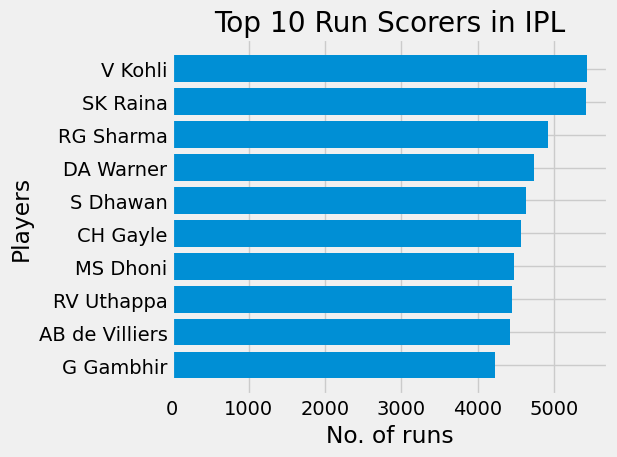

In [310]:
players= top_10.index.tolist()
runs= top_10['batsman_runs'].values.tolist()
players.reverse()
runs.reverse()
plt.style.use('fivethirtyeight')
plt.barh(players,runs)
plt.title('Top 10 Run Scorers in IPL')
plt.xlabel('No. of runs')
plt.ylabel('Players')
plt.tight_layout()
plt.show()


In [232]:
#Find the dismissal kind and vizualise
dismissal_data =df2['dismissal_kind'].value_counts() 

dismissal_kind
caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: count, dtype: int64

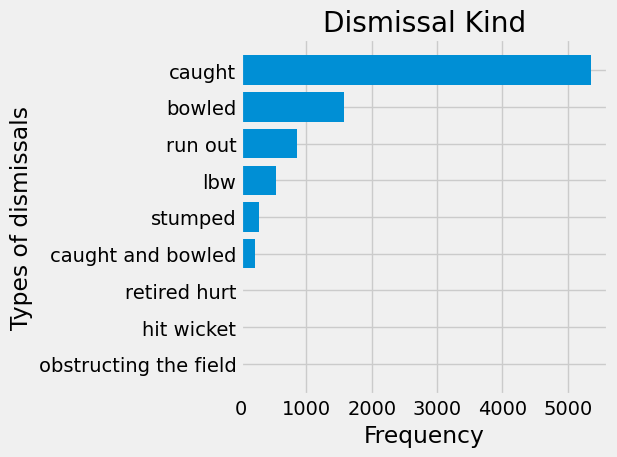

In [309]:
kind= dismissal_data.index.tolist()
num= dismissal_data.values.tolist()
kind.reverse()
num.reverse()
plt.style.use('fivethirtyeight')
plt.barh(kind, num)
plt.title('Dismissal Kind')
plt.xlabel('Frequency')
plt.ylabel('Types of dismissals')
plt.tight_layout()
plt.show()

In [241]:
MOM_awardees= df1['player_of_match'].value_counts().head(15)
MOM_awardees

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
V Kohli           12
AM Rahane         12
DR Smith          11
A Mishra          11
V Sehwag          11
Name: count, dtype: int64

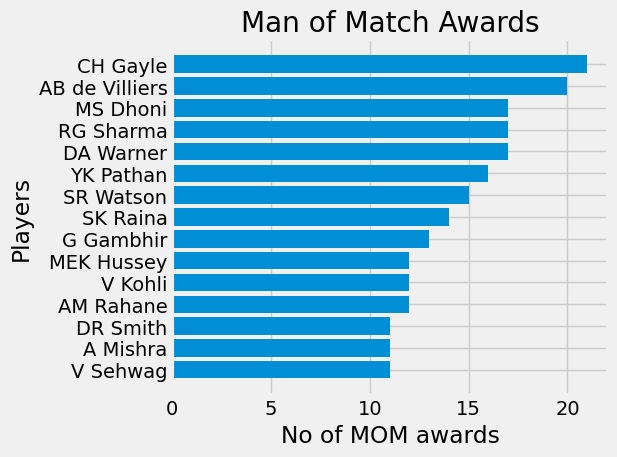

In [308]:
MOM_players= MOM_awardees.index.tolist()
Award_num= MOM_awardees.values.tolist()
MOM_players.reverse()
Award_num.reverse()
plt.style.use('fivethirtyeight')
plt.barh(MOM_players, Award_num)
plt.title('Man of Match Awards')
plt.xlabel('No of MOM awards')
plt.ylabel('Players')
plt.tight_layout()
plt.show()

In [283]:
#Compare matches played, won and win rate
matches = pd.concat((df1['team1'],df1['team2']))
played_matches = matches.value_counts().reset_index(name='Matches_played').sort_values(by='index')
played_matches_list = played_matches['Matches_played'].tolist()
teams = played_matches['index'].tolist()

won_matches = df1['winner'].value_counts().reset_index(name='Matches_won').sort_values(by='winner')
won_matches_list = won_matches['Matches_won'].tolist()


In [284]:
win_rate=[]
for i,j in zip(won_matches_list,played_matches_list):
    win_rate.append((i/j)*100)
print(win_rate)

[60.97560975609756, 38.666666666666664, 62.5, 41.61490683229814, 43.333333333333336, 46.590909090909086, 42.857142857142854, 51.68539325842697, 58.288770053475936, 26.08695652173913, 51.02040816326531, 62.5, 35.714285714285715, 46.666666666666664, 53.70370370370371]


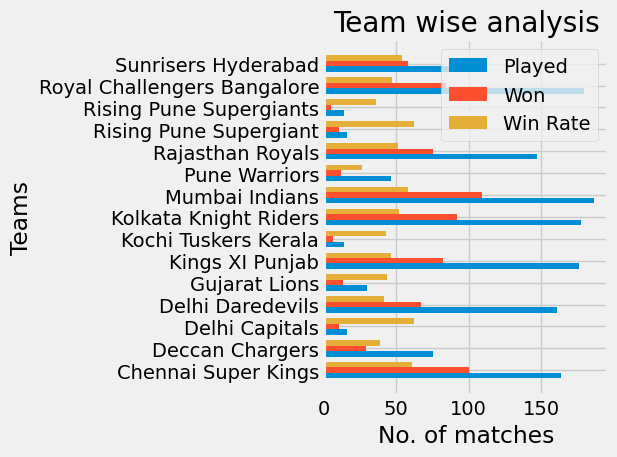

In [307]:
plt.style.use('fivethirtyeight')
y_indexes = np.arange(len(teams))
width = 0.25
plt.barh(y_indexes - width , played_matches_list , label ='Played', height = width)
plt.barh(y_indexes, won_matches_list, label ='Won', height = width)
plt.barh(y_indexes + width, win_rate, label ='Win Rate', height = width)
plt.title('Team wise analysis')
plt.ylabel('Teams')
plt.xlabel('No. of matches')
plt.yticks(ticks= y_indexes, labels = teams)
plt.legend()
plt.tight_layout()
plt.show()

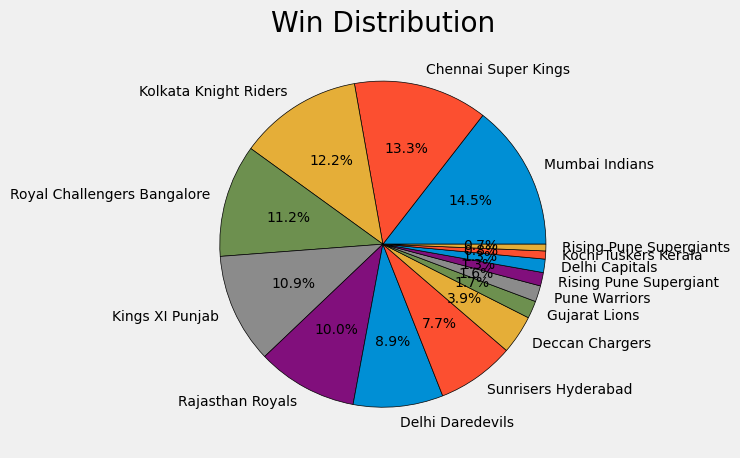

In [322]:
wins = df1['winner'].value_counts()
team = wins.index.tolist()
slices = wins.values.tolist()
plt.pie(slices, labels = team, textprops={'fontsize': 10}, wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
plt.title('Win Distribution')
plt.tight_layout()
plt.show()

In [331]:
bat_dec= df1['toss_decision']=='bat'
batting = df1.loc[bat_dec, 'season'].value_counts().reset_index(name='bat_decisions').sort_values(by='season')
year_list= batting['season'].tolist()
bat_dec_list= batting['bat_decisions'].tolist()

field_dec= df1['toss_decision']=='field'
fielding = df1.loc[field_dec, 'season'].value_counts().reset_index(name='field_decisions').sort_values(by='season')
field_dec_list= fielding['field_decisions'].tolist()


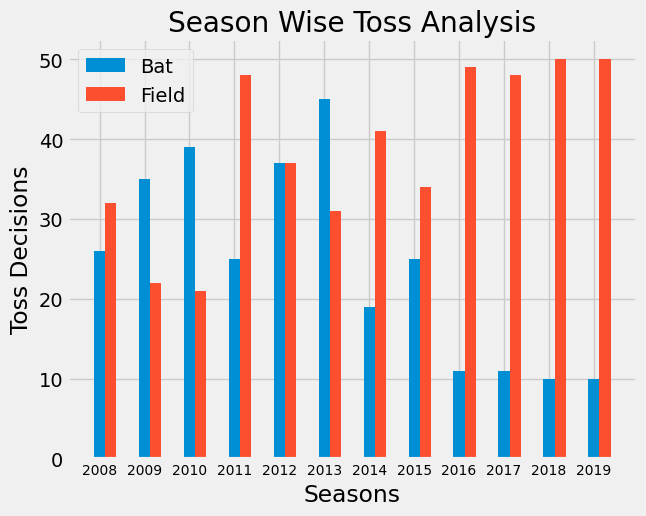

In [349]:
x_indexes= np.arange(len(year_list))
width= 0.25
plt.bar(x_indexes,bat_dec_list, label='Bat', width=width)
plt.bar(x_indexes + width,field_dec_list, label='Field', width=width)
plt.xticks(ticks= x_indexes, labels= year_list, fontsize=10)
plt.tight_layout()
plt.title('Season Wise Toss Analysis')
plt.ylabel('Toss Decisions')
plt.xlabel('Seasons')
plt.legend()
plt.show()

In [355]:
matches = pd.concat((df1['team1'],df1['team2']))
played_matches = matches.value_counts().reset_index(name='Matches_played').sort_values(by='index')
played_matches_list = played_matches['Matches_played'].tolist()
teams = played_matches['index'].tolist()

won_matches = df1['winner'].value_counts().reset_index(name='Matches_won').sort_values(by='winner')
won_matches_list = won_matches['Matches_won'].tolist()

ratio=[]
for i,j in zip(won_matches_list,played_matches_list):
    ratio.append((j/i))

new_df= pd.DataFrame([teams, played_matches_list, won_matches_list, ratio])
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
1,164,75,16,161,30,176,14,178,187,46,147,16,14,180,108
2,100,29,10,67,13,82,6,92,109,12,75,10,5,84,58
3,1.64,2.586207,1.6,2.402985,2.307692,2.146341,2.333333,1.934783,1.715596,3.833333,1.96,1.6,2.8,2.142857,1.862069
